In [139]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from process_real import *
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


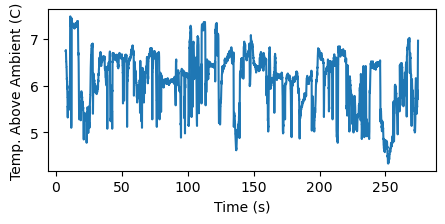

In [178]:
df = get_pandas_data('formatted_data/cosmic_standing.csv', True)
plt.figure(figsize=(5, 2.1))
plt.plot(df.index/1000, df['obj_temp'] - df['amb_temp'])
plt.ylabel('Temp. Above Ambient (C)')
plt.xlabel('Time (s)')
plt.show()

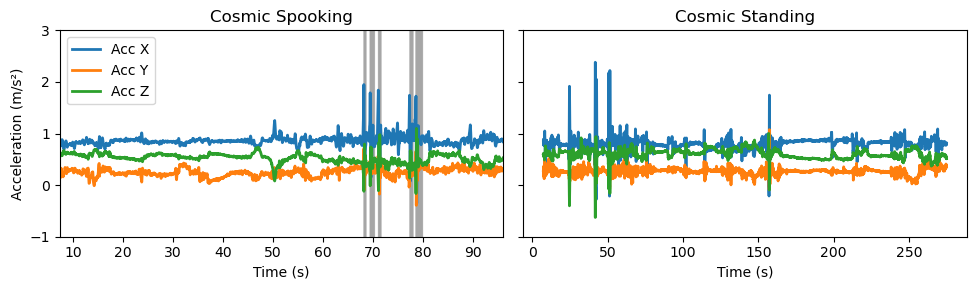

In [175]:
csc_sp = get_pandas_data('formatted_data/cosmic_spooking.csv', True)
csc_st = get_pandas_data('formatted_data/cosmic_standing.csv', True)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# Custom colormap for gradient
cmap = LinearSegmentedColormap.from_list("confidence_cmap", ["white", "grey"])

# Plot the gradient as an image
miny= -1
maxy = 3
extent = [csc_sp.index.min()/1000, csc_sp.index.max()/1000, miny, maxy]  # Adjust extent to match your plot range

# Create 2D arrays for the labeling images
label_img_csc_sp = np.expand_dims(csc_sp['label'], axis=0)  # Single-row
label_img_csc_sp = np.repeat(label_img_csc_sp, 100, axis=0)  # Repeat rows to create a 2D background
ax[0].imshow(label_img_csc_sp, aspect='auto', extent=extent, origin='lower', cmap=cmap, alpha=0.7)

# Plot sensor data
ax[0].set_ylim(miny, maxy)
ax[0].plot(csc_sp.index/1000, csc_sp['acc_x_c'], label='Acc X', linewidth=2)
ax[0].plot(csc_sp.index/1000, csc_sp['acc_y_c'], label='Acc Y', linewidth=2)
ax[0].plot(csc_sp.index/1000, csc_sp['acc_z_c'], label='Acc Z', linewidth=2)

ax[1].set_ylim(miny, maxy)
ax[1].plot(csc_st.index/1000, csc_st['acc_x_c'], label='Acc X', linewidth=2)
ax[1].plot(csc_st.index/1000, csc_st['acc_y_c'], label='Acc Y', linewidth=2)
ax[1].plot(csc_st.index/1000, csc_st['acc_z_c'], label='Acc Z', linewidth=2)

# Add labels, legend, and title
ax[1].set_xlabel("Time (s)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel(u"Acceleration (m/s\u00b2)")
ax[0].set_title("Cosmic Spooking")
ax[1].set_title("Cosmic Standing")
ax[0].legend(loc=2)

plt.tight_layout()
plt.show()

In [58]:
data_frame = get_pandas_data('formatted_data/coy_walking.csv')
dfu = pd.read_csv('formatted_data/coy_walking.csv')

/var/folders/v9/s58xd34544v4pswyy56q43400000gn/T/ipykernel_68075/493216270.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


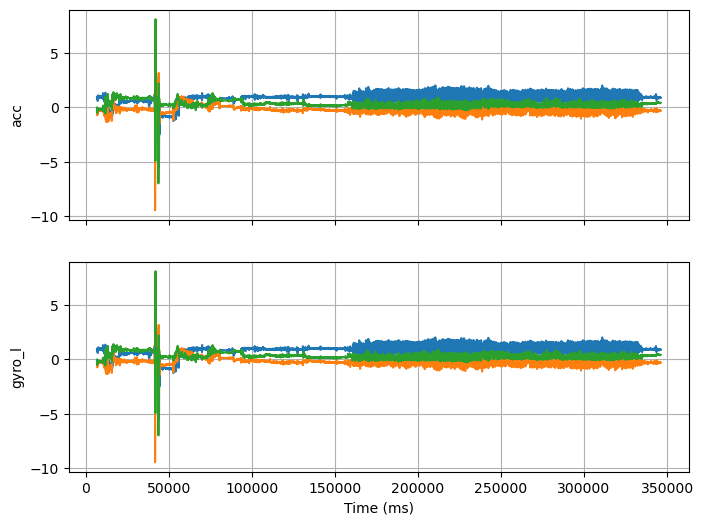

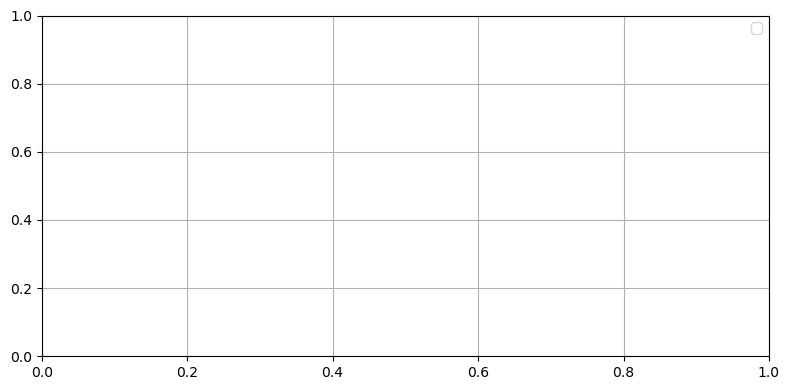

acc_x_c       float64
acc_y_c       float64
acc_z_c       float64
gyro_x_c      float64
gyro_y_c      float64
gyro_z_c      float64
imu_temp_c    float64
acc_x_l       float64
acc_y_l       float64
acc_z_l       float64
gyro_x_l      float64
gyro_y_l      float64
gyro_z_l      float64
imu_temp_l    float64
acc_x_r       float64
acc_y_r       float64
acc_z_r       float64
gyro_x_r      float64
gyro_y_r      float64
gyro_z_r      float64
imu_temp_r    float64
obj_temp      float64
amb_temp      float64
label           int64
dtype: object


In [59]:
# lower_end = 25000 #10000
# higher_end = 26000 # 25000
# new_frame = data_frame[(data_frame.index >= lower_end) & (data_frame.index <= higher_end)]
# dfu = dfu[(dfu.millis >= lower_end) & (dfu.millis <= higher_end)]
# new_frame = data_frame[mask]
# new_frame = data_frame.dropna().reset_index(drop=True)
new_frame = data_frame

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

plt.figure(figsize=(8, 4))
axs[0].plot(new_frame.index, new_frame['acc_x_c'], label='acc_x_c')
axs[0].plot(new_frame.index, new_frame['acc_y_c'], label='acc_y_c')
axs[0].plot(new_frame.index, new_frame['acc_z_c'], label='acc_z_c')
axs[0].grid(True)
axs[0].set_ylabel('acc')

axs[1].plot(dfu['millis'], dfu['acc_x_c'], label='acc_x_c')
axs[1].plot(dfu['millis'], dfu['acc_y_c'], label='acc_y_c')
axs[1].plot(dfu['millis'], dfu['acc_z_c'], label='acc_z_c')
axs[1].grid(True)
axs[1].set_ylabel('gyro_l')

# axs[2].plot(new_frame.index, new_frame['gyro_x_r'], label='gyro_x_r')
# axs[2].plot(new_frame.index, new_frame['gyro_y_r'], label='gyro_y_r')
# axs[2].plot(new_frame.index, new_frame['gyro_z_r'], label='gyro_z_r')
# axs[2].grid(True)
# axs[2].set_ylabel('gyro_r')

# axs[3].plot(new_frame.index, new_frame['obj_temp'], label='obj_temp')
# axs[3].plot(new_frame.index, new_frame['amb_temp'], label='amb_temp')
# axs[3].grid(True)
# axs[3].set_ylabel('temp')

# plt.plot(new_frame['millis'], new_frame['gyro_x_r'], label='gyro_x_r', marker='o')
# plt.plot(new_frame['millis'], new_frame['gyro_y_r'], label='gyro_y_r', marker='o')
# plt.plot(new_frame['millis'], new_frame['gyro_z_r'], label='gyro_z_r', marker='o')
# plt.grid(True)

axs[1].set_xlabel('Time (ms)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

print(data_frame.dtypes)

#Spook around 24000?
#10300 is ~2.915 sec in melody's video

In [21]:
df2 = pd.read_csv('formatted_data/cosmic_spooking.csv')

/var/folders/v9/s58xd34544v4pswyy56q43400000gn/T/ipykernel_33522/374195121.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


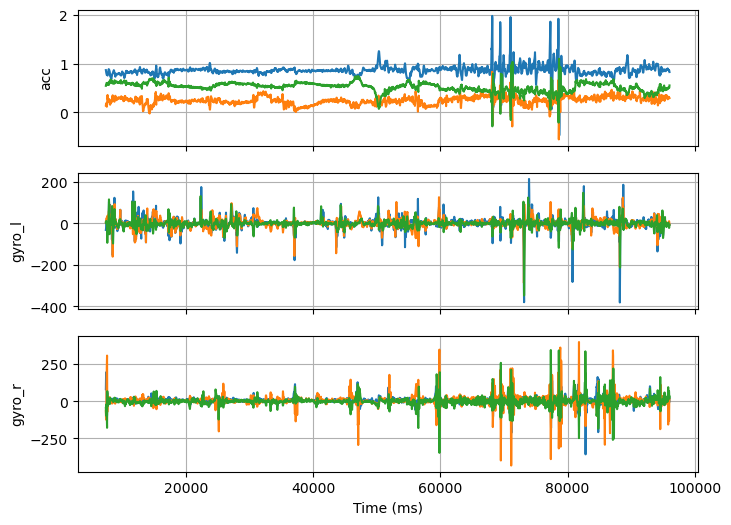

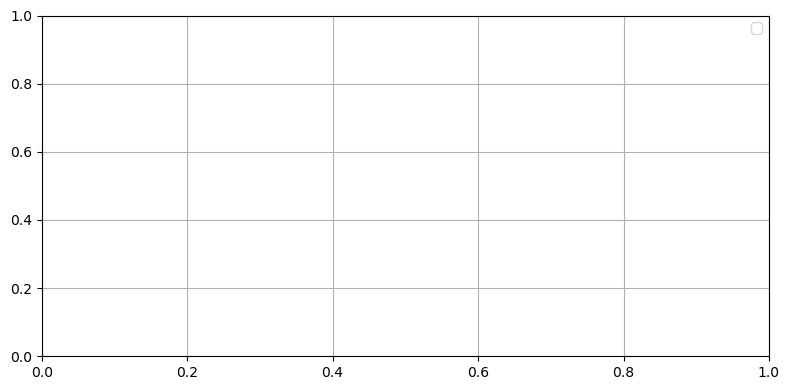

In [22]:
# lower_end = 17000 #10000
# higher_end = 19000 # 25000
# mask = df2['millis'].between(lower_end,higher_end)
# new_frame = df2[mask]
new_frame = df2

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

plt.figure(figsize=(8, 4))
axs[0].plot(new_frame['millis'], new_frame['acc_x_c'], label='acc_x_c')
axs[0].plot(new_frame['millis'], new_frame['acc_y_c'], label='acc_y_c')
axs[0].plot(new_frame['millis'], new_frame['acc_z_c'], label='acc_z_c')
axs[0].grid(True)
axs[0].set_ylabel('acc')

axs[1].plot(new_frame['millis'], new_frame['gyro_x_l'], label='gyro_x_l')
axs[1].plot(new_frame['millis'], new_frame['gyro_y_l'], label='gyro_y_l')
axs[1].plot(new_frame['millis'], new_frame['gyro_z_l'], label='gyro_z_l')
axs[1].grid(True)
axs[1].set_ylabel('gyro_l')

axs[2].plot(new_frame['millis'], new_frame['gyro_x_r'], label='gyro_x_r')
axs[2].plot(new_frame['millis'], new_frame['gyro_y_r'], label='gyro_y_r')
axs[2].plot(new_frame['millis'], new_frame['gyro_z_r'], label='gyro_z_r')
axs[2].grid(True)
axs[2].set_ylabel('gyro_r')

# plt.plot(new_frame['millis'], new_frame['gyro_x_r'], label='gyro_x_r', marker='o')
# plt.plot(new_frame['millis'], new_frame['gyro_y_r'], label='gyro_y_r', marker='o')
# plt.plot(new_frame['millis'], new_frame['gyro_z_r'], label='gyro_z_r', marker='o')
# plt.grid(True)

axs[2].set_xlabel('Time (ms)')
plt.legend()

plt.grid(True)
plt.tight_layout()
cursor(axs[2], hover=True)
plt.show()

#Spook around 24000?
#10300 is ~2.915 sec in melody's video

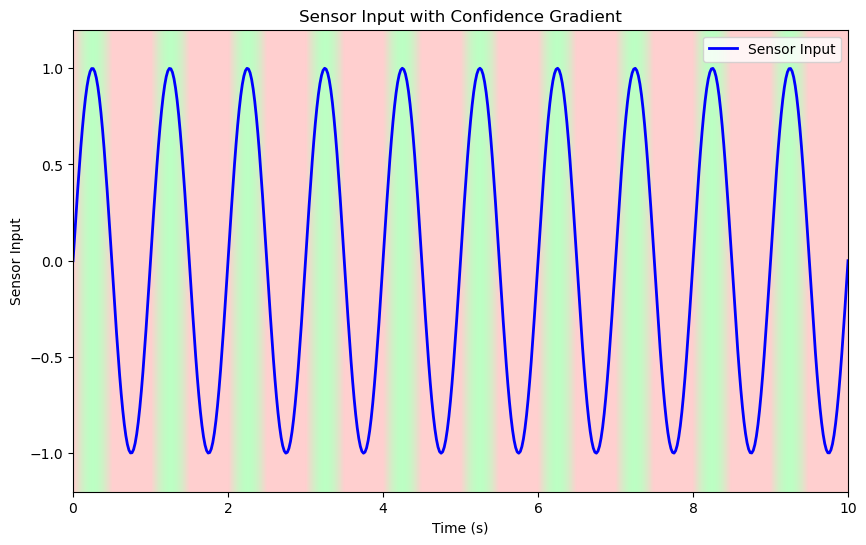

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate example data
time = np.linspace(0, 10, 500)  # Time points
sensor_input = np.sin(2 * np.pi * time)  # Example sensor data
model_confidence = np.clip(sensor_input, 0, 1)  # Example confidence (0 to 1)

# Custom colormap for gradient
cmap = LinearSegmentedColormap.from_list("confidence_cmap", ["#FF9F9F", "#79FF87"])

# Create a 2D array for the gradient
gradient = np.tile(model_confidence, (100, 1))  # Repeat confidence values as rows for the background

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the gradient as an image
extent = [time.min(), time.max(), -1.2, 1.2]  # Adjust extent to match your plot range
ax.imshow(gradient, aspect='auto', extent=extent, origin='lower', cmap=cmap, alpha=0.5)

# Overlay the sensor data plot
ax.plot(time, sensor_input, color='blue', label='Sensor Input', linewidth=2)

# Add labels, legend, and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("Sensor Input")
ax.set_title("Sensor Input with Confidence Gradient")
ax.legend()

plt.show()


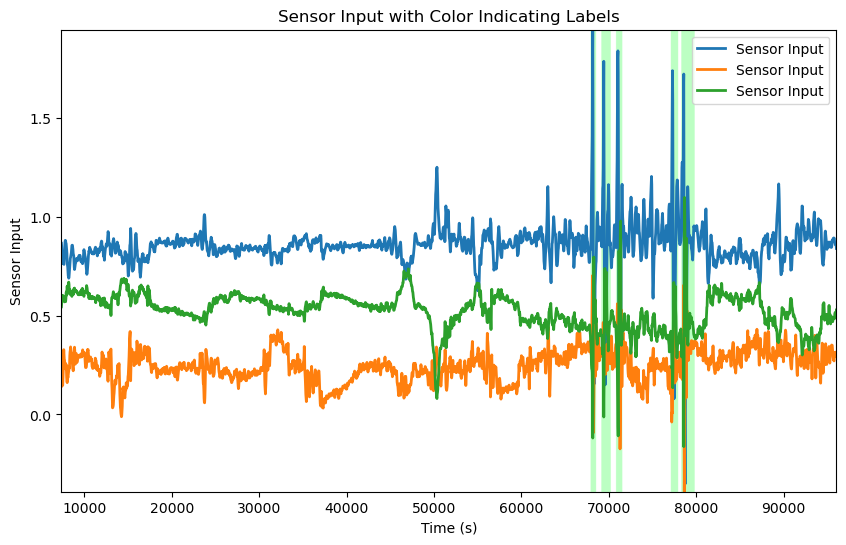

In [46]:
df3 = get_pandas_data('formatted_data/cosmic_spooking.csv', True)

# mask = df3.index.between(10000, 30000)
# df3 = df3[mask]
# millis_regular = np.linspace(df3.index.min(), df3.index.max(), len(df3))
# label_interpolated = np.interp(millis_regular, df3.index, df3['label'])

# Custom colormap for gradient
cmap = LinearSegmentedColormap.from_list("confidence_cmap", ["white", "#79FF87"])

# Create a 2D array for the gradient
gradient = np.expand_dims(df3['label'], axis=0)  # Single-row gradient
gradient = np.repeat(gradient, 100, axis=0)  # Repeat rows to create a 2D background

# # Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the gradient as an image
miny= min(df3['acc_x_c'].min(), df3['acc_y_c'].min(), df3['acc_z_c'].min())
maxy = max(df3['acc_x_c'].max(), df3['acc_y_c'].max(), df3['acc_z_c'].max())
extent = [df3.index.min(), df3.index.max(), miny, maxy]  # Adjust extent to match your plot range
ax.imshow(gradient, aspect='auto', extent=extent, origin='lower', cmap=cmap, alpha=0.5)

# Overlay the sensor data plot
ax.plot(df3.index, df3['acc_x_c'], label='Sensor Input', linewidth=2)
ax.plot(df3.index, df3['acc_y_c'], label='Sensor Input', linewidth=2)
ax.plot(df3.index, df3['acc_z_c'], label='Sensor Input', linewidth=2)

# Add labels, legend, and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("Sensor Input")
ax.set_title("Sensor Input with Color Indicating Labels")
ax.legend()

plt.show()

In [123]:
datapoints, labels = get_window_features(window_length=10, overlapping=False, interpolate=False)#get_raw_features(interpolate=True)

(2752, 80)
(2752,)


In [124]:
nb = GaussianNB()
nb.fit(datapoints, labels)

GaussianNB()

In [125]:
pred_labels = nb.predict(datapoints)
print(f1_score(labels, pred_labels))

0.1342281879194631


In [126]:
negative_points = datapoints[labels == 0]
positive_points = datapoints[labels == 1]
print(negative_points.shape)
print(positive_points.shape)

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)
svm.fit(negative_points)


(2732, 80)
(20, 80)


OneClassSVM(gamma=0.001, nu=0.2)

In [127]:
predictions = svm.predict(datapoints)
pred_labels = (predictions + 1)//2
print(accuracy_score(labels, pred_labels))
print(precision_score(labels, pred_labels))
print(recall_score(labels, pred_labels))

print(((labels == 1) & (pred_labels == 1)).sum())
print(((labels == 0) & (pred_labels == 1)).sum())


0.373546511627907
0.0005861664712778429
0.05
1
1705


In [128]:
lm = LinearRegression()
lm.fit(datapoints, labels)

LinearRegression()

In [129]:
predictions = lm.predict(datapoints)
pred_labels = (predictions > 0).astype(int)
print(pred_labels)
print(get_accuracy(pred_labels, labels))

[1 1 1 ... 0 0 0]
2752
0.47238372093023256


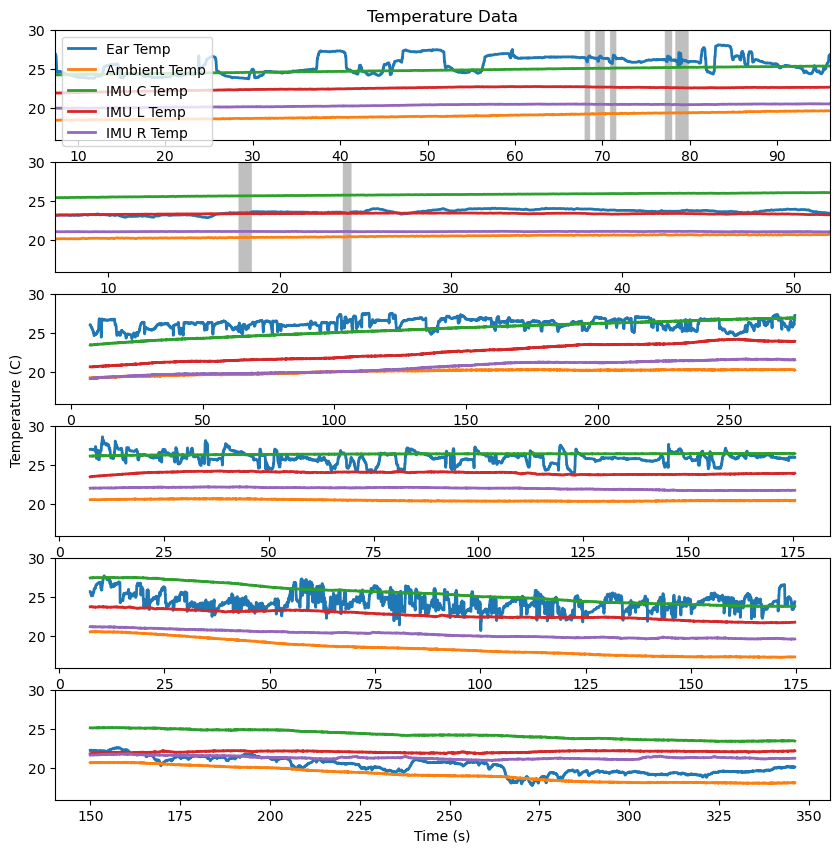

In [192]:
csc_sp = get_pandas_data('formatted_data/cosmic_spooking.csv', True)
coy_sp = get_pandas_data('formatted_data/coy_spooking.csv', True)
csc_st = get_pandas_data('formatted_data/cosmic_standing.csv', True)
coy_st = get_pandas_data('formatted_data/coy_standing.csv', True)
csc_w = get_pandas_data('formatted_data/cosmic_walking.csv', True)
coy_w = get_pandas_data('formatted_data/coy_walking.csv', True)

dfs = [csc_sp, coy_sp, csc_st, coy_st, csc_w, coy_w]

for df in dfs:
  df.index /= 1000

# Plotting
fig, ax = plt.subplots(6, 1, figsize=(10, 10))

# Custom colormap for gradient
cmap = LinearSegmentedColormap.from_list("confidence_cmap", ["white", "grey"])

# Plot the gradient as an image
miny= 16
maxy = 30
extent = [csc_sp.index.min(), csc_sp.index.max(), miny, maxy]  # Adjust extent to match your plot range

# Create 2D arrays for the labeling images
label_img_csc_sp = np.expand_dims(csc_sp['label'], axis=0)  # Single-row
label_img_csc_sp = np.repeat(label_img_csc_sp, 100, axis=0)  # Repeat rows to create a 2D background
ax[0].imshow(label_img_csc_sp, aspect='auto', extent=extent, origin='lower', cmap=cmap, alpha=0.5)

extent = [coy_sp.index.min(), coy_sp.index.max(), miny, maxy]  # Adjust extent to match your plot range

label_img_coy_sp = np.expand_dims(coy_sp['label'], axis=0)  # Single-row
label_img_coy_sp = np.repeat(label_img_coy_sp, 100, axis=0)  # Repeat rows to create a 2D background
ax[1].imshow(label_img_coy_sp, aspect='auto', extent=extent, origin='lower', cmap=cmap, alpha=0.5)

# Plot sensor data
for i, df in enumerate(dfs):
  ax[i].set_ylim(miny, maxy)
  plot_axis(ax[i], df)

# Add labels, legend, and title
# fig.text(0.08, 0.5, u"Acceleration (m/s\u00b2)", va='center', rotation='vertical')
# ax[5].set_xlabel("Time (s)")
# ax[0].set_title("Center IMU Data")
fig.text(0.08, 0.5, u"Temperature (C)", va='center', rotation='vertical')
ax[5].set_xlabel("Time (s)")
ax[0].set_title("Temperature Data")
ax[0].legend(loc=2)

plt.show()

In [140]:
get_windows_scaled(3, False, True)

(10364, 21, 3)
(10364,)


(array([[[0.52998696, 0.52325076, 0.50999565],
         [0.48835085, 0.50479671, 0.52672453],
         [0.56101426, 0.57131537, 0.58597464],
         ...,
         [0.75      , 0.75      , 0.71296296],
         [0.        , 0.00806452, 0.01612903],
         [0.        , 0.        , 0.        ]],
 
        [[0.4997827 , 0.49130813, 0.4865276 ],
         [0.52535404, 0.49154865, 0.49231004],
         [0.59865293, 0.60736926, 0.60697306],
         ...,
         [0.67592593, 0.67592593, 0.52314815],
         [0.00806452, 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.4865276 , 0.48522382, 0.48457193],
         [0.52002436, 0.55824577, 0.62677021],
         [0.60618067, 0.59587956, 0.58676704],
         ...,
         [0.37037037, 0.21759259, 0.21759259],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.49337261, 0.49852725, 0.49484536],
         [0.4934442 , 0.49664215, 0.50271